# How severe was the United States of America's climate change compared to the rest of the world?


**Introduction**

The reference climate data are gathered by the Berkeley Earth and repackaged by Kaggle. Berkeley Earth was founded in 2010 to illustrate global warming by observing global temperatures and analyzing climate change from these data. This dataset contains the monthly average temperatures of cities, states, countries and the globe from up to 2013. The PM2.5 Global Air Pollution 2010-2017 data is referenced by Brauer on The World Bank website. This dataset contains the annual average exposure of PM 2.5 in micrograms per cubic meter for each country. The land temperature is not the same as the air temperature, which is reported in weather forcast. It is the measurement of the temperature of the land surface.

This project aims to analyze the degree of climate change in the United States of America compared to global climate change in twenty-one years. To achieve this goal, I will statistically graph and analyze the annual average land temperatures in the US compared to the other countries in North America. Another topic of this project is to determine the correlation between the concentration of PM 2.5 in the air and the land temperature in the US. From analyzing the change in US's land temperature with respect to different years and PM 2.5 concentration, we will gain a more comprehensive understanding of climate change in the US.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# upload the data
city_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalLandTemperaturesByCity.csv")
major_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalLandTemperaturesByMajorCity.csv")
state_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalLandTemperaturesByState.csv")
country_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalLandTemperaturesByCountry.csv")
global_temperature = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\GlobalTemperatures.csv")
pollution = pd.read_csv(r"C:\Users\amyc0\OneDrive\Documents\ECO225\archive\PM2.5GlobalAirPollution.csv")

In [5]:
# data cleaning process
# drop the missing data
city_t = city_temperature.dropna()
major_t = major_temperature.dropna()
state_t = state_temperature.dropna()
country_t = country_temperature.dropna()
global_t = global_temperature.dropna()

In [6]:
# data cleaning process
# collect all the data of USA
us_city_t = city_t.groupby("Country").get_group("United States")
us_major_t = major_t.groupby("Country").get_group("United States")
us_state_t = state_t.groupby("Country").get_group("United States")

us_poll = pollution.dropna().groupby("Country Name").get_group("United States").drop(['2016', '2017'], axis=1)
us_poll_1 = us_poll.T.reset_index().drop([0, 1])
us_poll_1.rename(columns={"index": "Year", 227: "pm2.5"}, inplace=True)

**Summary Statistics of X1 and Y**

The first independent variable I choose is time, which is measured in years.

X1 : Year

Y  : Average land temperature in the US

The statistic summary is in the table below. The mean is US's annual average land temperatures calculated by taking the mean from the monthly average land temperatures. The min and the max represent the degrees of the coldest and the warmest months of a year, which describes the range of the temperature of a year. The range of temperatures is worth studying because climate change is not only about global warming, but also the increased frequency of extreme weather. I choose time to be an independent variable because it reveals global warming.

In [59]:
us_t = country_t.groupby("Country").get_group("United States")
usa_t = pd.DataFrame({"Year" : [x[:4] for x in us_t["dt"]], "Monthly Average Land Temperature" : us_t["AverageTemperature"]})

# Describe the summary statistics of the independent variable year and dependent variable Average Land Temperature
usa_t[usa_t["Year"]>"1992"].groupby("Year").describe()

Monthly Average Land Temperature                                       \
                                count       mean       std    min      25%   
Year                                                                         
1993                             12.0   8.867250  9.128539 -3.498  1.16925   
1994                             12.0   9.270333  9.386635 -3.729  1.80000   
1995                             12.0   9.331000  8.981776 -2.139  2.02400   
1996                             12.0   8.754333  9.402509 -4.316  1.13500   
1997                             12.0   9.172917  9.150793 -4.012  2.26500   
1998                             12.0  10.141167  8.926180 -1.690  2.73775   
1999                             12.0   9.567000  8.813897 -2.550  2.27900   
2000                             12.0   9.649750  9.082017 -3.459  1.90575   
2001                             12.0   9.785583  9.023614 -2.052  1.77200   
2002                             12.0   9.816167  8.992205 -1.166  1.50425   
2003                             12.0   9.755083  9.111083 -1.820  2.24450   
2004                             12.0   9.667500  9.005986 -3.841  2.91075   
2005                             12.0   9.892667  9.061019 -1.884  2.76300   
2006                             12.0   9.974500  8.879165 -0.574  2.05375   
2007                             12.0   9.837500  9.504001 -2.959  2.89750   
2008                             12.0   8.951417  9.346232 -3.883  1.72450   
2009                             12.0   9.137083  9.248552 -3.569  2.04725   
2010                             12.0   9.505583  9.694852 -3.610  2.05075   
2011                             12.0   9.549917  9.484540 -3.507  2.06575   
2012                             12.0  10.261083  9.061826 -2.268  2.64300   
2013                              9.0  11.297111  9.915754 -2.155  2.28900   

                                 
          50%       75%     max  
Year                             
1993   8.9185  16.26525  21.254  
1994   9.3035  17.41625  21.694  
1995   9.0025  17.17150  21.632  
1996   8.3985  16.45000  21.636  
1997   8.1565  17.85400  21.597  
1998   9.6500  18.48075  22.626  
1999   9.0985  16.92975  21.923  
2000   9.5315  17.21725  21.605  
2001   9.4300  17.53300  21.907  
2002   9.2495  18.15150  22.675  
2003  10.2400  16.94200  22.499  
2004  10.0290  17.15800  21.663  
2005   9.6430  18.17525  22.478  
2006   9.7290  16.97725  22.911  
2007   9.7040  17.95000  22.352  
2008   8.5330  17.27050  21.690  
2009   8.3530  17.61575  21.463  
2010  10.2315  18.00925  22.078  
2011   9.5360  17.75550  22.722  
2012   9.9420  17.76550  23.008  
2013  14.0730  20.19800  22.074

**Graph 1**

X1 : Year

Y : Average Land temperature (Celsius)

The graph "Average Land Temperature of USA from 1993 to 2013" illustrates defines the range and the median monthly temperature of each year from 1993 to 2013 in the US. The green line in the middle of each bar is the median temperature of the 12 months. The black lines in the top and bottom of each year represents the range of monthly temperatures.

From the graph we observe that the highest temperatures do not vary much as the lowest temperatures. However, the median temperature of the US has a farily higher increase after 2008. The overall change of the median temperature of each year is not clear in this graph. For instance, the median average temperatures have a slight increase from 1999 to 2000, and then fall from 2000 to 2001 with a little difference. 

In conclusion, this graph aims the define the change in temperature range of each year since the annual average temperature is not shown by the boxplot.

Text(0.5, 1.0, 'Annual Average Land Temperature of USA from 1993 to 2013')

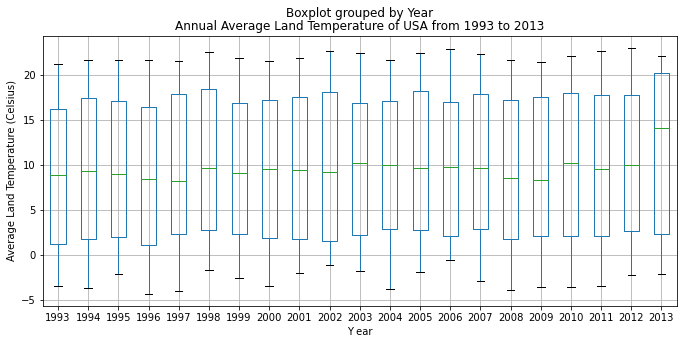

In [57]:
# graph 1
# graph the boxplot of the data of the USA from 2003 to 2013
# X1 : year
# Y : Average Land temperature (Celsius)
us_box = usa_t[usa_t["Year"]>"1992"].boxplot(by="Year", figsize=(11, 5))
us_box.set_ylabel("Average Land Temperature (Celsius)")
us_box.set_xlabel("Y ear")
us_box.set_title("Average Land Temperature of USA from 1993 to 2013")

**Graph 2**

X1 : Year

Y : Average Land temperature (Celsius)
    
The graph "Annual Land Average Temperature of the USA from 1993 to 2013" is different from graph 1 because it illustrates the annual average temperatures instead of monthly average temperatures. This graph provides a more direct visual representation of the change in average temperatures in twenty-one years. 

We observe that over these 21 years, the highest annual average temperature occurred in 2013. The average temperatures were rising after 2018. the instant rise from 1996 to 1998 had been maintained until 2008, when another trough happened, which indicated a fairly low annual average temperature. In general, the average temperatures were in a rising pattern. Thus, we can conclude from this graph that the United States is affected by the global warming from the increasing annual average temperatures.

(8.0, 12.5)

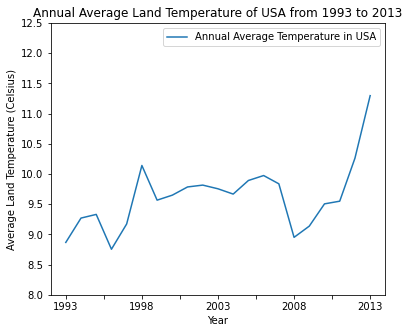

In [71]:
# graph 2
# A complement to graph 1
# X : year
# Y : Average temperature (Celsius)
us_annual_avgtemp = usa_t[usa_t["Year"]>"1992"].groupby("Year")["Monthly Average Land Temperature"]

# calculate the annual average temperature from the monthly average temperature
annual_avg = pd.DataFrame()
annual_avg["Annual Average Temperature in USA"] = us_annual_avgtemp.mean()
us_annual_temp_air = pd.merge(annual_avg.reset_index(), us_poll_1, on="Year", how="left").set_index("Year")

at_line = us_annual_temp_air.reset_index().plot(x="Year", y="Annual Average Temperature in USA", figsize=(6, 5))
at_line.set_title("Annual Average Land Temperature of USA from 1993 to 2013")
at_line.set_ylabel("Average Land Temperature (Celsius)")

at_line.set_ylim(8, 12.5)

**Summary Statistics of X2 and Y**

The second independent variable I choose is the air pollution, which is measured in micrograms of PM 2.5 per cubic meter in the air.

X2 : PM 2.5 in micrograms percubic meter

Y  : Average land temperature in the US

The data gather the US's annual average concentration of PM 2.5 in the air and the annual average land temperature from 2010 to 2013. The purpose is to analyze how is the exposure of PM 2.5 correlated with the land temperature. There are only four data because the Air Pollution dataset is from 2010 to 2017, while the Temperature dataset ends up in 2013. The mean column is the average land temperatures with respect to the corresponding PM 2.5 concentration. I choose PM2.5 concentration to be the second independent variable because greenhouse gasses are the root cause of global warming. I want to know how air pollution affects land temperature.

In [62]:
# Merge the temperature data and the pm2.5 data
temp_air = pd.merge(usa_t[usa_t["Year"]>"2002"], us_poll_1, on="Year").set_index("Year")
temp_air["Annual Average Land Temperature"] = usa_t[usa_t["Year"]>"2009"].groupby("Year")["Monthly Average Land Temperature"].mean()

# Describe the summary statistics of the independent variable pm2.5 concentration
# and the dependent variable Average Land Temperature
temp_air.drop(["Monthly Average Land Temperature"], axis=1).groupby("pm2.5").describe()

Annual Average Land Temperature                                      \
                                   count       mean           std        min   
pm2.5                                                                          
8.734777                             9.0  11.297111  1.884111e-15  11.297111   
9.003163                            12.0  10.261083  0.000000e+00  10.261083   
9.358636                            12.0   9.505583  0.000000e+00   9.505583   
9.740641                            12.0   9.549917  1.855344e-15   9.549917   

                                                      
                25%        50%        75%        max  
pm2.5                                                 
8.734777  11.297111  11.297111  11.297111  11.297111  
9.003163  10.261083  10.261083  10.261083  10.261083  
9.358636   9.505583   9.505583   9.505583   9.505583  
9.740641   9.549917   9.549917   9.549917   9.549917

**Graph 3**

X2 : PM 2.5 in micrograms percubic meter

Y  : Average land temperature in the US
    
The graph aims to determine the correlation between PM 2.5 concentration and land temperature. From the graph, we can tell that the highest land temperature occurs at the lowest PM 2.5 concentration in the air. The lowest land temperature occurs at the second-highest PM 2.5 concentration, which is about 9.36 micrograms/cubic meter. However, the second-lowest land temperature at the highest PM 2.5 concentration is only about 0.05 degrees Celcius higher than the lowest land temperature.

We can conclude from this graph that the concentration of PM 2.5 in the air is a factor that alters land temperature. It is negatively correlated with land temperature so that the land temperature decreases as PM 2.5 is more concentrated in the air. However, from the two rightmost dots, we are rational to guess that PM 2.5 concentration has a limited effect on the land temperature.

(8.5, 10.0)

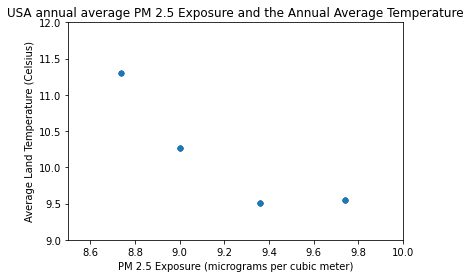

In [76]:
# graph 3
# graph the scatter plot of the Data of USA from 2010 to 2013
# X : PM2.5 micrograms per cubic meter
# Y : Average temperature (Celsius)
us_dot = temp_air.plot(kind="scatter", x="pm2.5", y="Annual Average Land Temperature")
us_dot.set_ylabel("Average Land Temperature (Celsius)")
us_dot.set_xlabel("PM 2.5 Exposure (micrograms per cubic meter)")
us_dot.set_title("USA annual average PM 2.5 Exposure and the Annual Average Temperature")
us_dot.set_ylim(9.00, 12.00)
us_dot.set_xlim(8.5, 10)

**Graph 4**

X1 : Year

Y : Average Land Temperature
    
The line plot "Annual Average Land Temperature in Canada, United States, Mexico, Nicaragua, and Honduras from 2003 to 2013" includes five subgroups, which are the five largest countries in North America. I choose these variables because I want to compare the climate change in the US to the other countries in North America. 

From the graph, we can see that Nicaragua and Honduras have fairly similar climate change patter. All five countries experienced an instant increase in climate in 1998. Also, the average temperatures started to increase at a higher rate from 2010 to 2013, where Canada has the biggest climate change. 

In general, we can conclude that all five countries experienced climate change from 1993 to 2013. The US has a smoother climate change in comparison with Canada.

Text(0.5, 1.0, 'Annual Average Land Temperature in Canada, United States, Mexico, Nicaragua, and Honduras from 2003 to 2013')

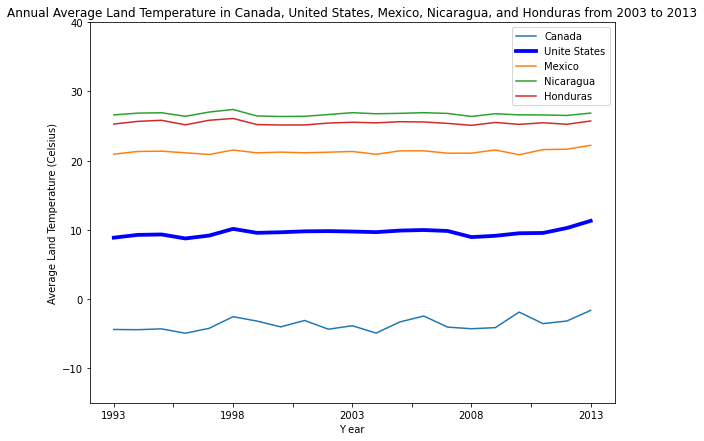

In [77]:
# graph 4:
# A graph of the five largest countries in North America 
# The five largest countries in North America are : Canada, United States, Mexico, Nicaragua, and Honduras
# X1 : year
# Y : Average Temperature

# First calculate the annual average temperatures for all countries
all_t = pd.DataFrame({ "Country": country_t["Country"], "Year" : [x[:4] for x in country_t["dt"]], 
                      "Average Temperature" : country_t["AverageTemperature"]})
c_annual_avgtemp = all_t[all_t["Year"]>"1992"].groupby(["Country", "Year"])["Average Temperature"]

# Calculate the annual average temperature for each country
an_avg = pd.DataFrame()
an_avg["Annual Average Temperature"] = c_annual_avgtemp.mean()

# Graph the line plot for the five countries
fig, ax = plt.subplots()
ax.set_ylim(-15, 40)

an_avg.groupby("Country").get_group("Canada").reset_index().plot(ax=ax, y="Annual Average Temperature", x="Year", legend=True, label="Canada", figsize=(9.4, 7))
an_avg.groupby("Country").get_group("United States").reset_index().plot(ax=ax, y="Annual Average Temperature", x="Year", legend=True, label="Unite States", linewidth=3.8, color="b")
an_avg.groupby("Country").get_group("Mexico").reset_index().plot(ax=ax, y="Annual Average Temperature", x="Year", legend=True, label="Mexico")
an_avg.groupby("Country").get_group("Nicaragua").reset_index().plot(ax=ax, y="Annual Average Temperature", x="Year", legend=True, label="Nicaragua")
an_avg.groupby("Country").get_group("Honduras").reset_index().plot(ax=ax, y="Annual Average Temperature", x="Year", legend=True, label="Honduras")

ax.legend(loc='upper right')
ax.set_ylabel("Average Land Temperature (Celsius)")
ax.set_xlabel("Y ear")
ax.set_title("Annual Average Land Temperature in Canada, United States, Mexico, Nicaragua, and Honduras from 2003 to 2013")

**Conclusion**

Graph 1 and Graph 2 show the change in temperatures in the US from 1993 to 2013. From the conclusion of these two graphs and Graph 4, we can conclude that the United States has been affected by global warming, resulting in an increase in annual average land temperature. From Graph 3, we conclude that the concentration of PM 2.5 is negatively correlated with land temperature. 

Some interesting questions I come up with when analyzing the graphs:
1. From graph 3: Does the concentration of PM 2.5 in the air has a limited effect on land temperature? In other words, does it only affect the land temperature to an extent?

2. From graph 4: What happened in 1998 and 2010 that instantly raised the overall climate in North America? What are some phenomena caused by these extreme climate changes?

3. From graph 4: Starting from 2010, the countries in North America experienced a continuous increase in land temperature. What are some laws on environmental protection published by the government to prevent further climate change and global warming?